In [21]:
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage import gaussian_filter
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import seaborn as sns

import matplotlib
from matplotlib.gridspec import GridSpec
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as imag
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mticker
import types

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch

import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import csv
import pandas as pd
import os

In [22]:
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (0, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72.0))


def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)

In [23]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

z = 30

# Table

In [24]:
Table_SPCAM5_heat_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/15_Min_Interval_Heat.npy")
Table_SPCAM5_moisture_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/15_Min_Interval_Moisture.npy")
Table_SPCAM3_heat_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/SPCAM3_15_Min_Interval_Heat.npy")
Table_SPCAM3_moisture_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/SPCAM3_15_Min_Interval_Moisture.npy")

Table_SPCAM5_heat_Daily = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Daily_Interval_Heat.npy")
Table_SPCAM5_moisture_Daily = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Daily_Interval_Moisture.npy")

Table_No_SHERPA_SPCAM5_heat_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/No_SHERPA_SPCAM5_15_Min_Interval_Heat.npy")
Table_No_SHERPA_SPCAM5_moist_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/NO_SHERPA_SPCAM5_15_Min_Interval_Moisture.npy")

In [25]:
Table_SPCAM3_heat_15[Table_SPCAM3_heat_15 < 0.0] = 0.0
Table_SPCAM3_heat_15[Table_SPCAM3_heat_15 > 1.0] = 1.0

Table_SPCAM3_moisture_15[Table_SPCAM3_moisture_15 < 0.0] = 0.0
Table_SPCAM3_moisture_15[Table_SPCAM3_moisture_15 > 1.0] = 1.0

Table_SPCAM5_heat_15[Table_SPCAM5_heat_15 < 0.0] = 0.0
Table_SPCAM5_heat_15[Table_SPCAM5_heat_15 > 1.0] = 1.0

Table_SPCAM5_moisture_15[Table_SPCAM5_moisture_15 < 0.0] = 0.0
Table_SPCAM5_moisture_15[Table_SPCAM5_moisture_15 > 1.0] = 1.0

Table_SPCAM5_heat_Daily[Table_SPCAM5_heat_Daily  < 0.0] = 0.0
Table_SPCAM5_heat_Daily[Table_SPCAM5_heat_Daily  > 1.0] = 1.0

Table_SPCAM5_moisture_Daily[Table_SPCAM5_moisture_Daily < 0.0] = 0.0
Table_SPCAM5_moisture_Daily[Table_SPCAM5_moisture_Daily > 1.0] = 1.0

Table_No_SHERPA_SPCAM5_heat_15[Table_No_SHERPA_SPCAM5_heat_15 < 0.0] = 0.0
Table_No_SHERPA_SPCAM5_heat_15[Table_No_SHERPA_SPCAM5_heat_15 > 1.0] = 1.0

Table_No_SHERPA_SPCAM5_moist_15[Table_No_SHERPA_SPCAM5_moist_15 < 0.0] = 0.0
Table_No_SHERPA_SPCAM5_moist_15[Table_No_SHERPA_SPCAM5_moist_15 > 1.0] = 1.0

In [26]:
Ocean_Table_SPCAM5_heat_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Ocean_Table_SPCAM5_heat_15[:,:,:] = np.nan
Ocean_Table_SPCAM5_moisture_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Ocean_Table_SPCAM5_moisture_15[:,:,:] = np.nan
Ocean_Table_SPCAM5_heat_Daily = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Ocean_Table_SPCAM5_heat_Daily[:,:,:] = np.nan
Ocean_Table_SPCAM5_moisture_Daily = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Ocean_Table_SPCAM5_moisture_Daily[:,:,:] = np.nan
Ocean_Table_No_SHERPA_SPCAM5_heat_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Ocean_Table_No_SHERPA_SPCAM5_heat_15[:,:,:] = np.nan
Ocean_Table_No_SHERPA_SPCAM5_moist_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Ocean_Table_No_SHERPA_SPCAM5_moist_15[:,:,:] = np.nan

Land_Table_SPCAM5_heat_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Land_Table_SPCAM5_heat_15[:,:,:] = np.nan
Land_Table_SPCAM5_moisture_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Land_Table_SPCAM5_moisture_15[:,:,:] = np.nan
Land_Table_SPCAM5_heat_Daily = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Land_Table_SPCAM5_heat_Daily[:,:,:] = np.nan
Land_Table_SPCAM5_moisture_Daily = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Land_Table_SPCAM5_moisture_Daily[:,:,:] = np.nan
Land_Table_No_SHERPA_SPCAM5_heat_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Land_Table_No_SHERPA_SPCAM5_heat_15[:,:,:] = np.nan
Land_Table_No_SHERPA_SPCAM5_moist_15 = np.empty(shape=(len(Table_SPCAM5_heat_15),len(Table_SPCAM5_heat_15[0]),len(Table_SPCAM5_heat_15[0][0])))
Land_Table_No_SHERPA_SPCAM5_moist_15[:,:,:] = np.nan

In [27]:
path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/TimestepOutput_Neuralnet_SPCAM_216.cam.h0.2018-07.nc'
land_frac = xr.open_dataset(path_to_file)
land_f = np.squeeze(land_frac.LANDFRAC.values)

new_land_frac = np.empty(shape=(144, 96))

for i in range(len(land_f)):
    for j in range(len(land_f[i])):
        new_land_frac[j, i] = land_f[i,j]

In [28]:
for i in range(len(Table_SPCAM5_heat_15)):
    for j in range(len(Table_SPCAM5_heat_15[0])):
        if new_land_frac[i,j] >= 0.5:
            Land_Table_SPCAM5_heat_15[i,j,:] = Table_SPCAM5_heat_15[i,j,:]
            Land_Table_SPCAM5_moisture_15[i,j,:] = Table_SPCAM5_moisture_15[i,j,:]
            Land_Table_SPCAM5_heat_Daily[i,j,:] = Table_SPCAM5_heat_Daily[i,j,:]
            Land_Table_SPCAM5_moisture_Daily[i,j,:] = Table_SPCAM5_moisture_Daily[i,j,:]
            Land_Table_No_SHERPA_SPCAM5_heat_15[i,j,:] = Table_No_SHERPA_SPCAM5_heat_15[i,j,:]
            Land_Table_No_SHERPA_SPCAM5_moist_15[i,j,:] = Table_No_SHERPA_SPCAM5_moist_15[i,j,:]
        if new_land_frac[i,j] < 0.5:
            Ocean_Table_SPCAM5_heat_15[i,j,:] = Table_SPCAM5_heat_15[i,j,:]
            Ocean_Table_SPCAM5_moisture_15[i,j,:] = Table_SPCAM5_moisture_15[i,j,:]
            Ocean_Table_SPCAM5_heat_Daily[i,j,:] = Table_SPCAM5_heat_Daily[i,j,:]
            Ocean_Table_SPCAM5_moisture_Daily[i,j,:] = Table_SPCAM5_moisture_Daily[i,j,:]
            Ocean_Table_No_SHERPA_SPCAM5_heat_15[i,j,:] = Table_No_SHERPA_SPCAM5_heat_15[i,j,:]
            Ocean_Table_No_SHERPA_SPCAM5_moist_15[i,j,:] = Table_No_SHERPA_SPCAM5_moist_15[i,j,:]

In [29]:
print("SPCAM3 heating Ocean 25th Percentile is",np.nanpercentile(Table_SPCAM3_heat_15, 25))
print("SPCAM3 heating Ocean 50th Percentile is",np.nanpercentile(Table_SPCAM3_heat_15, 50))
print("SPCAM3 heating Ocean 75th Percentile is",np.nanpercentile(Table_SPCAM3_heat_15, 75))

print("SPCAM3 Moist ocean 25th Percentile is",np.nanpercentile(Table_SPCAM3_moisture_15, 25))
print("SPCAM3 Moist ocean 50th Percentile is",np.nanpercentile(Table_SPCAM3_moisture_15, 50))
print("SPCAM3 Moist ocean 75th Percentile is",np.nanpercentile(Table_SPCAM3_moisture_15, 75))

print("SPCAM5 heating Ocean 25th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_heat_15, 25))
print("SPCAM5 heating Ocean 50th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_heat_15, 50))
print("SPCAM5 heating Ocean 75th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_heat_15, 75))

print("SPCAM5 Moist ocean 25th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_moisture_15, 25))
print("SPCAM5 Moist ocean 50th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_moisture_15, 50))
print("SPCAM5 Moist ocean 75th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_moisture_15, 75))

print("SPCAM5 heating Ocean daily 25th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_heat_Daily, 25))
print("SPCAM5 heating Ocean daily 50th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_heat_Daily, 50))
print("SPCAM5 heating Ocean daily 75th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_heat_Daily, 75))

print("SPCAM5 Moist ocean daily 25th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_moisture_Daily, 25))
print("SPCAM5 Moist ocean daily 50th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_moisture_Daily, 50))
print("SPCAM5 Moist ocean daily 75th Percentile is",np.nanpercentile(Ocean_Table_SPCAM5_moisture_Daily, 75))

print("SPCAM5 No Sherpa heating Ocean 25th Percentile is",np.nanpercentile(Ocean_Table_No_SHERPA_SPCAM5_heat_15, 25))
print("SPCAM5 No Sherpa heating Ocean 50th Percentile is",np.nanpercentile(Ocean_Table_No_SHERPA_SPCAM5_heat_15, 50))
print("SPCAM5 No Sherpa heating Ocean 75th Percentile is",np.nanpercentile(Ocean_Table_No_SHERPA_SPCAM5_heat_15, 75))

print("SPCAM5 No Sherpa Moist ocean 25th Percentile is",np.nanpercentile(Ocean_Table_No_SHERPA_SPCAM5_moist_15, 25))
print("SPCAM5 No Sherpa Moist ocean 50th Percentile is",np.nanpercentile(Ocean_Table_No_SHERPA_SPCAM5_moist_15, 50))
print("SPCAM5 No Sherpa Moist ocean 75th Percentile is",np.nanpercentile(Ocean_Table_No_SHERPA_SPCAM5_moist_15, 75))

print("SPCAM5 heating Land 25th Percentile is",np.nanpercentile(Land_Table_SPCAM5_heat_15, 25))
print("SPCAM5 heating Land 50th Percentile is",np.nanpercentile(Land_Table_SPCAM5_heat_15, 50))
print("SPCAM5 heating Land 75th Percentile is",np.nanpercentile(Land_Table_SPCAM5_heat_15, 75))

print("SPCAM5 Moist Land 25th Percentile is",np.nanpercentile(Land_Table_SPCAM5_moisture_15, 25))
print("SPCAM5 Moist Land 50th Percentile is",np.nanpercentile(Land_Table_SPCAM5_moisture_15, 50))
print("SPCAM5 Moist Land 75th Percentile is",np.nanpercentile(Land_Table_SPCAM5_moisture_15, 75))

print("SPCAM5 heating Land daily 25th Percentile is",np.nanpercentile(Land_Table_SPCAM5_heat_Daily, 25))
print("SPCAM5 heating Land daily 50th Percentile is",np.nanpercentile(Land_Table_SPCAM5_heat_Daily, 50))
print("SPCAM5 heating Land daily 75th Percentile is",np.nanpercentile(Land_Table_SPCAM5_heat_Daily, 75))

print("SPCAM5 Moist Land daily 25th Percentile is",np.nanpercentile(Land_Table_SPCAM5_moisture_Daily, 25))
print("SPCAM5 Moist Land daily 50th Percentile is",np.nanpercentile(Land_Table_SPCAM5_moisture_Daily, 50))
print("SPCAM5 Moist Land daily 75th Percentile is",np.nanpercentile(Land_Table_SPCAM5_moisture_Daily, 75))

print("SPCAM5 No Sherpa heating Land 25th Percentile is",np.nanpercentile(Land_Table_No_SHERPA_SPCAM5_heat_15, 25))
print("SPCAM5 No Sherpa heating Land 50th Percentile is",np.nanpercentile(Land_Table_No_SHERPA_SPCAM5_heat_15, 50))
print("SPCAM5 No Sherpa heating Land 75th Percentile is",np.nanpercentile(Land_Table_No_SHERPA_SPCAM5_heat_15, 75))

print("SPCAM5 No Sherpa Moist Land 25th Percentile is",np.nanpercentile(Land_Table_No_SHERPA_SPCAM5_moist_15, 25))
print("SPCAM5 No Sherpa Moist Land 50th Percentile is",np.nanpercentile(Land_Table_No_SHERPA_SPCAM5_moist_15, 50))
print("SPCAM5 No Sherpa Moist Land 75th Percentile is",np.nanpercentile(Land_Table_No_SHERPA_SPCAM5_moist_15, 75))

SPCAM3 heating Ocean 25th Percentile is 0.055823967107731826
SPCAM3 heating Ocean 50th Percentile is 0.2676598925472862
SPCAM3 heating Ocean 75th Percentile is 0.5464287996400369
SPCAM3 Moist ocean 25th Percentile is 0.0
SPCAM3 Moist ocean 50th Percentile is 0.0
SPCAM3 Moist ocean 75th Percentile is 0.21461224196789813
SPCAM5 heating Ocean 25th Percentile is 0.3268544901037695
SPCAM5 heating Ocean 50th Percentile is 0.5840611563761017
SPCAM5 heating Ocean 75th Percentile is 0.7983892350836836
SPCAM5 Moist ocean 25th Percentile is 0.0
SPCAM5 Moist ocean 50th Percentile is 0.1822196172609244
SPCAM5 Moist ocean 75th Percentile is 0.524752098843114
SPCAM5 heating Ocean daily 25th Percentile is 0.4407346795161938
SPCAM5 heating Ocean daily 50th Percentile is 0.728458943644174
SPCAM5 heating Ocean daily 75th Percentile is 0.877962784822349
SPCAM5 Moist ocean daily 25th Percentile is 0.0
SPCAM5 Moist ocean daily 50th Percentile is 0.4717187304546565
SPCAM5 Moist ocean daily 75th Percentile is

# Figure 1

In [86]:
SPCAM5_heat_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_SPCAM5_15_Min_Interval_Heat.npy")
SPCAM5_moisture_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_SPCAM5_15_Min_Interval_Moisture.npy")
SPCAM3_heat_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_SPCAM3_15_Min_Interval_Heat.npy")
SPCAM3_moisture_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_SPCAM3_15_Min_Interval_Moisture.npy")

SPCAM5_heat_Daily = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_Daily_SPCAM5_15_Min_Interval_Heat.npy")
SPCAM5_moisture_Daily = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_Daily_SPCAM5_15_Min_Interval_Moistening.npy")

SPCAM5_Xs = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/X_Coords.npy")
SPCAM5_pband = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Z_Coords.npy")
SPCAM3_Xs = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/SPCAM3_X_Coords.npy")
SPCAM3_pband = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/SPCAM3_Z_Coords.npy")

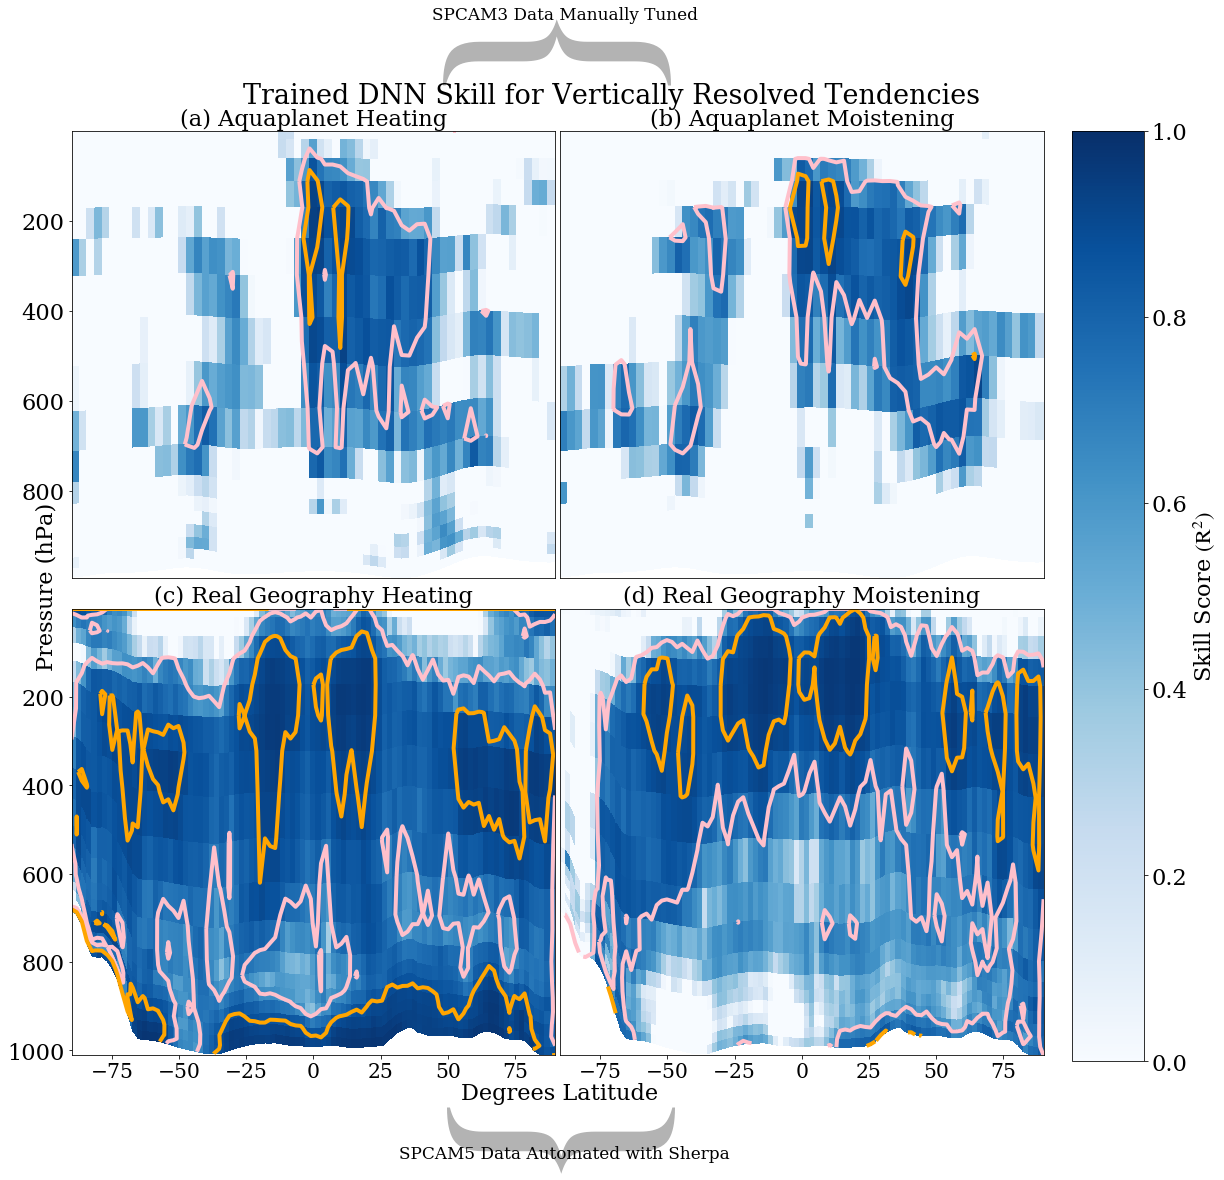

In [87]:

#fig, ax = plt.subplots(2,2, figsize=(15,15))
fig, ax = plt.subplots(2,2, figsize=(20,17))

ax[0,0].pcolor(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,0].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, [0.7], colors='pink', linewidths=[4])
ax[0,0].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, [0.9], colors='orange', linewidths=[4])
ax[0,0].set_title("(a) Aquaplanet Heating", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

ax[0,1].pcolor(SPCAM3_Xs, SPCAM3_pband, SPCAM3_moisture_15,  cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,1].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_moisture_15,  [0.7], colors='pink', linewidths=[4])
ax[0,1].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_moisture_15,  [0.9], colors='orange', linewidths=[4])
ax[0,1].set_title("(b) Aquaplanet Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.04,-0.02)

ax[1,0].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[1,0].set_title("(c) Real Geography Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

contour_plot = ax[1,1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.7], colors='pink', linewidths=[4])
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.9], colors='orange', linewidths=[4])
ax[1,1].set_title("(d) Real Geography Moistening", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xlabel("Degrees Latitude")
ax[1,1].xaxis.set_label_coords(-0.0,-0.06)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

trans = ax[0,0].get_xaxis_transform() # x in data untis, y in axes fraction
ax[0,0].annotate(r"$\}$", fontsize=265, alpha=0.3, xy=(40, 1.15), xycoords=trans, rotation=90)
ax[0,0].annotate("SPCAM3 Data Manually Tuned", fontsize=fz*0.75, xy=(43, 1.25), xycoords=trans)

trans = ax[1,1].get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax[1,1].annotate(r"$\}$", fontsize=265, alpha=0.3, xy=(-135, -0.14), xycoords=trans, rotation=270)
ax[1,1].annotate("SPCAM5 Data Automated with Sherpa", fontsize=fz*0.75, xy=(-150, -0.23), xycoords=trans)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
plt.suptitle("Trained DNN Skill for Vertically Resolved Tendencies", y = 0.92)
plt.subplots_adjust(hspace=0.07, wspace=0.01)
print(" ")

plt.savefig("Paper_Figures/Figure1.png")
plt.savefig("Paper_Figures/Figure1.pdf")

# Figure 2

In [88]:
No_SHERPA_SPCAM5_heat_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_NO_SHERPA_SPCAM5_15_Min_Interval_Heat.npy")
No_SHERPA_SPCAM5_moist_15 = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Improved_NO_SHERPA_SPCAM5_15_Min_Interval_Moisture.npy")

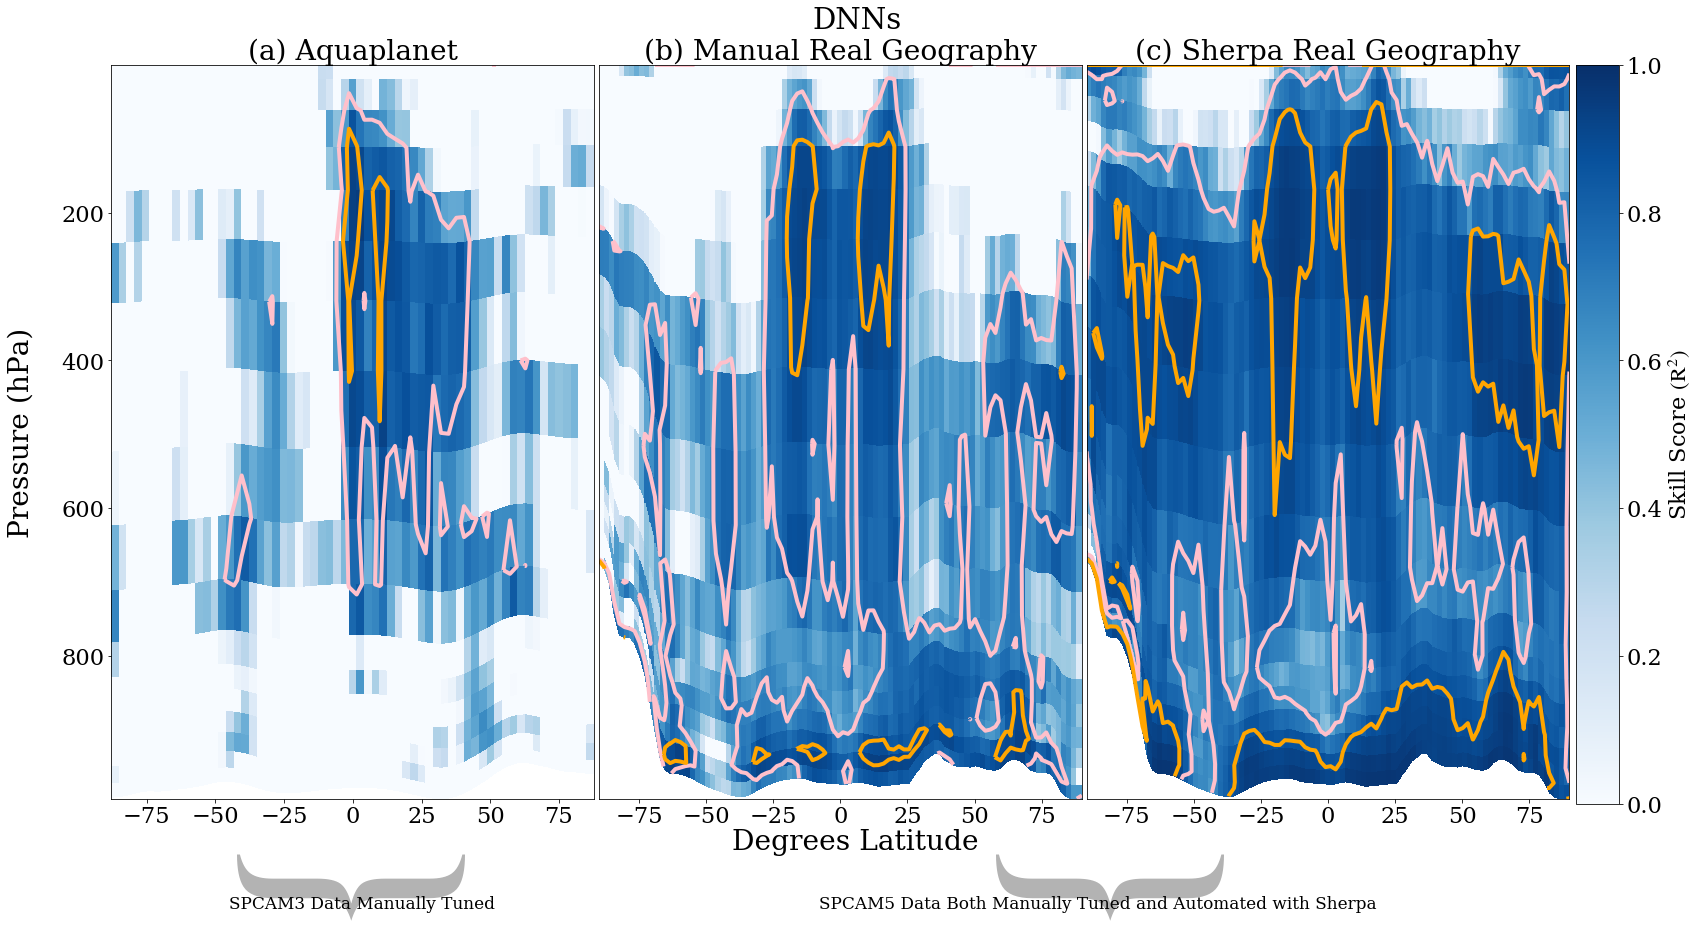

In [89]:
fig, ax = plt.subplots(1,3, figsize=(30,13.5))

ax[0].pcolor(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, [0.7], colors='pink', linewidths=[4])
ax[0].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, [0.9], colors='orange', linewidths=[4])
ax[0].set_title("(a) Aquaplanet", fontsize = fz*1.25)
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].set_xlabel("Degrees Latitude", fontsize=fz*1.25)
ax[0].xaxis.set_label_coords(1.54,-0.04)
ax[0].locator_params(nbins=8)
ax[0].tick_params(axis='x', labelsize=fz)

ax[1].pcolor(SPCAM5_Xs, SPCAM5_pband, No_SHERPA_SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1].contour(SPCAM5_Xs, SPCAM5_pband, No_SHERPA_SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[1].contour(SPCAM5_Xs, SPCAM5_pband, No_SHERPA_SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[1].set_title("(b) Manual Real Geography", fontsize = fz*1.25)
ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[1].set_yticks([])
#ax[0].set_xlabel("Degrees Latitude")
#ax[0].xaxis.set_label_coords(1.1,-0.10)
ax[1].locator_params(nbins=8)
ax[1].tick_params(axis='x', labelsize=fz)

ax[2].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[2].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[2].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[2].set_title("(c) Sherpa Real Geography", fontsize = fz*1.25)
ax[2].set_yticks([])
ax[2].set_ylim(ax[2].get_ylim()[::-1])
ax[2].set_ylabel("Pressure (hPa)", fontsize=fz*1.25)
ax[2].yaxis.set_label_coords(-2.18,0.5)
ax[2].locator_params(nbins=8)
ax[2].tick_params(axis='x', labelsize=fz)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.803, 0.12, 0.02, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
plt.suptitle("DNNs", x=0.47, y=0.94, fontsize=fz*1.3)
plt.subplots_adjust(wspace=0.01)

trans = ax[0].get_xaxis_transform() # x in data untis, y in axes fraction
ax[0].annotate(r"$\}$", fontsize=265, alpha=0.3, xy=(-45, -0.09), xycoords=trans, rotation=270)
ax[0].annotate("SPCAM3 Data Manually Tuned", fontsize=fz*0.75, xy=(-45, -0.15), xycoords=trans)

trans = ax[1].get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax[1].annotate(r"$\}$", fontsize=265, alpha=0.3, xy=(55, -0.09), xycoords=trans, rotation=270)
ax[1].annotate("SPCAM5 Data Both Manually Tuned and Automated with Sherpa", fontsize=fz*0.75, xy=(-8, -0.15), xycoords=trans)

plt.savefig("Paper_Figures/Figure2.png")
plt.savefig("Paper_Figures/Figure2.pdf")

# Figure 3

In [90]:
others = netCDF4.Dataset("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
lons = np.array(others.variables['lon'])
lats = np.array(others.variables['lat'])
Xvar, Yvar = np.meshgrid(lons, lats)

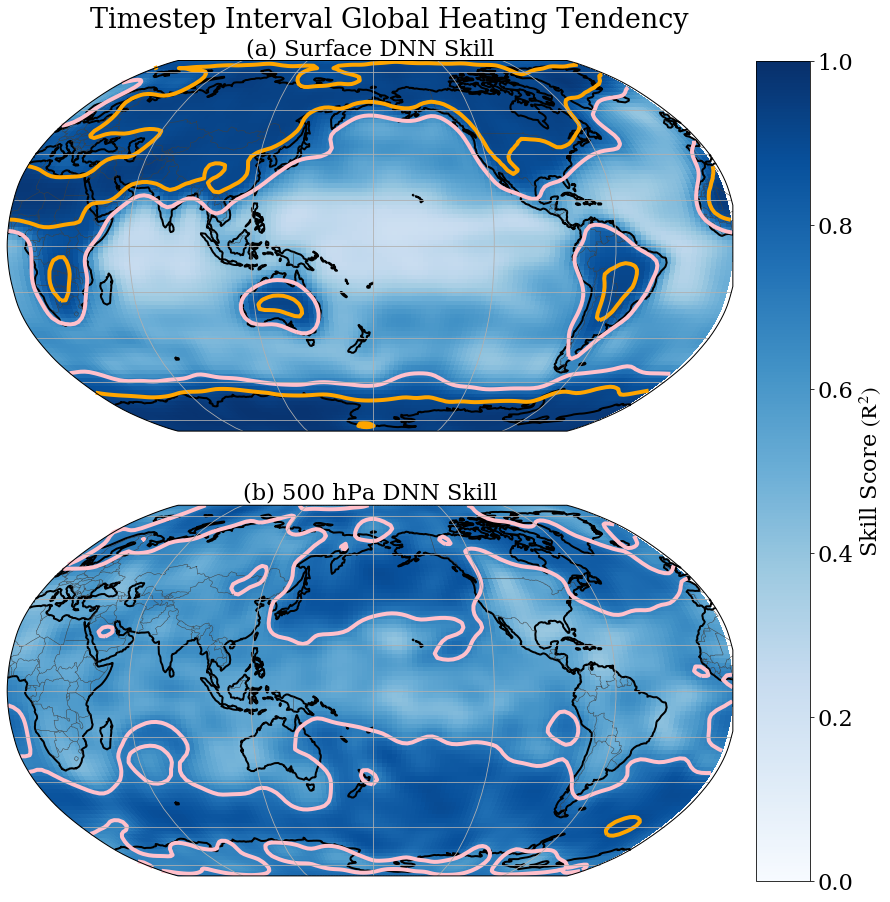

In [91]:
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)

#SPCAM5_lat_lon_new = gaussian_filter(SPCAM5_lat_lon, 2, mode='nearest')
SPCAM5_lat_lon_new = gaussian_filter(np.squeeze(Table_SPCAM5_heat_15[:,:,-1]), 2, mode='nearest')
contour_plot = ax[0].pcolormesh(Xvar, Yvar, SPCAM5_lat_lon_new.T,cmap='Blues', vmin = 0, vmax = 1.0, transform=ccrs.PlateCarree())
ax[0].contour(Xvar, Yvar, SPCAM5_lat_lon_new.T, [0.7], colors='pink', linewidths=[4], transform=ccrs.PlateCarree())
ax[0].contour(Xvar, Yvar, SPCAM5_lat_lon_new.T, [0.9], colors='orange', linewidths=[4], transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
#plt.colorbar(contour_plot, label = "Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', ax=ax[0])
ax[0].set_title('(a) Surface DNN Skill', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

#SPCAM5_500_new = gaussian_filter(SPCAM5_500, 2, mode='nearest')
SPCAM5_500_new = gaussian_filter(np.squeeze(Table_SPCAM5_heat_15[:,:,-12]), 2, mode='nearest')
contour_plot = ax[1].pcolormesh(Xvar, Yvar, SPCAM5_500_new.T,cmap='Blues', vmin = 0, vmax = 1.0, transform=ccrs.PlateCarree())
ax[1].contour(Xvar, Yvar, SPCAM5_500_new.T, [0.7], colors='pink', linewidths=[4], transform=ccrs.PlateCarree())
ax[1].contour(Xvar, Yvar, SPCAM5_500_new.T, [0.9], colors='orange', linewidths=[4], transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', ax=ax[1])
ax[1].set_title('(b) 500 hPa DNN Skill', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

plt.suptitle("Timestep Interval Global Heating Tendency", y=0.93, x=0.48)

plt.savefig("Paper_Figures/Figure3.png")
plt.savefig("Paper_Figures/Figure3.pdf")

# Figure 4

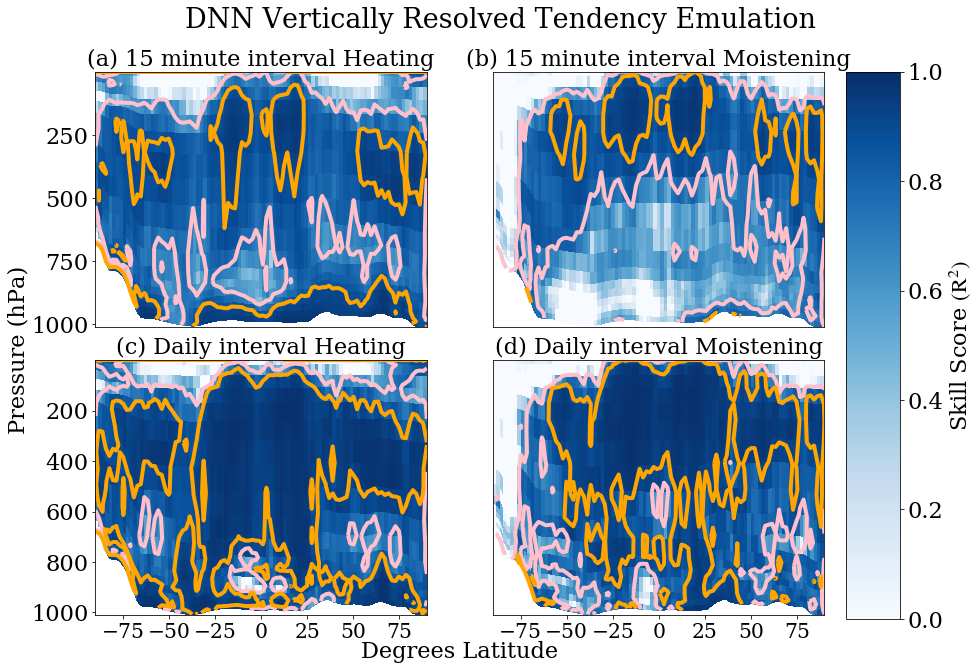

In [92]:
#fig, ax = plt.subplots(2,2, figsize=(15,15))
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0,0].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[0,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[0,0].set_title("(a) 15 minute interval Heating", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

ax[0,1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.7], colors='pink', linewidths=[4])
ax[0,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.9], colors='orange', linewidths=[4])
ax[0,1].set_title("(b) 15 minute interval Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.40,-0.09)

ax[1,0].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_Daily, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_Daily, [0.7], colors='pink', linewidths=[4])
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_Daily, [0.9], colors='orange', linewidths=[4])
ax[1,0].set_title("(c) Daily interval Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

contour_plot = ax[1,1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_Daily, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_Daily, [0.7], colors='pink', linewidths=[4])
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_Daily, [0.9], colors='orange', linewidths=[4])
ax[1,1].set_title("(d) Daily interval Moistening", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xlabel("Degrees Latitude")
ax[1,1].xaxis.set_label_coords(-0.10,-0.10)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
plt.suptitle("DNN Vertically Resolved Tendency Emulation", y=0.97)
plt.subplots_adjust(hspace=0.13)
print(" ")

plt.savefig("Paper_Figures/Figure4.png")
plt.savefig("Paper_Figures/Figure4.pdf")

# Figure 5

In [93]:
Moisture_Spectra_True = np.load("Data_For_Paper/Weighted_Basic_Spectral_Truth_Moistening.npy")
Moisture_Spectra_Predict = np.load("Data_For_Paper/Weighted_Basic_Spectral_Prediction_Moistening.npy")
Heat_Spectra_Predict = np.load("Data_For_Paper/Weighted_Basic_Spectral_Prediction_Heat.npy")
Heat_Spectra_True = np.load("Data_For_Paper/Weighted_Basic_Spectral_Truth_Heat.npy")
SPCAM5_freqs = np.load('Data_For_Paper/Basic_Spectral_Frequencies.npy')
CAM_Heat_Spectra = np.load('Data_For_Paper/Updated_Weighted_CAM_Spectra_Heat.npy')
CAM_Moisture_Spectra = np.load('Data_For_Paper/Updated_Weighted_CAM_Spectra_Moisture.npy')
CAM_Freqs_Spectra = np.load('Data_For_Paper/Updated_CAM_Spectra_freqs_Moisture.npy')

Ocean_Moisture_Spectra_True = np.load("Data_For_Paper/Weighted_Basic_Spectral_Truth_Moisture_Ocean.npy")
Ocean_Moisture_Spectra_Predict = np.load("Data_For_Paper/Weighted_Basic_Spectral_Prediction_Moisture_Ocean.npy")
Ocean_Heat_Spectra_True = np.load("Data_For_Paper/Weighted_Basic_Spectral_Truth_Heat_Ocean.npy")
Ocean_Heat_Spectra_Predict = np.load("Data_For_Paper/Weighted_Basic_Spectral_Prediction_Heat_Ocean.npy")
Ocean_CAM_Heat_Spectra = np.load('Data_For_Paper/Weighted_CAM_Spectra_Heat_Ocean.npy')
Ocean_CAM_Moisture_Spectra = np.load('Data_For_Paper/Weighted_CAM_Spectra_Moisture_Ocean.npy')

Land_Moisture_Spectra_True = np.load("Data_For_Paper/Weighted_Basic_Spectral_Truth_Moisture_Land.npy")
Land_Moisture_Spectra_Predict = np.load("Data_For_Paper/Weighted_Basic_Spectral_Prediction_Moisture_Land.npy")
Land_Heat_Spectra_Predict = np.load("Data_For_Paper/Weighted_Basic_Spectral_Prediction_Heat_Land.npy")
Land_Heat_Spectra_True = np.load("Data_For_Paper/Weighted_Basic_Spectral_Truth_Heat_Land.npy")
Land_CAM_Heat_Spectra = np.load('Data_For_Paper/Weighted_CAM_Spectra_Heat_Land.npy')
Land_CAM_Moisture_Spectra = np.load('Data_For_Paper/Weighted_CAM_Spectra_Moisture_Land.npy')

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/export/home/gmooers/miniconda

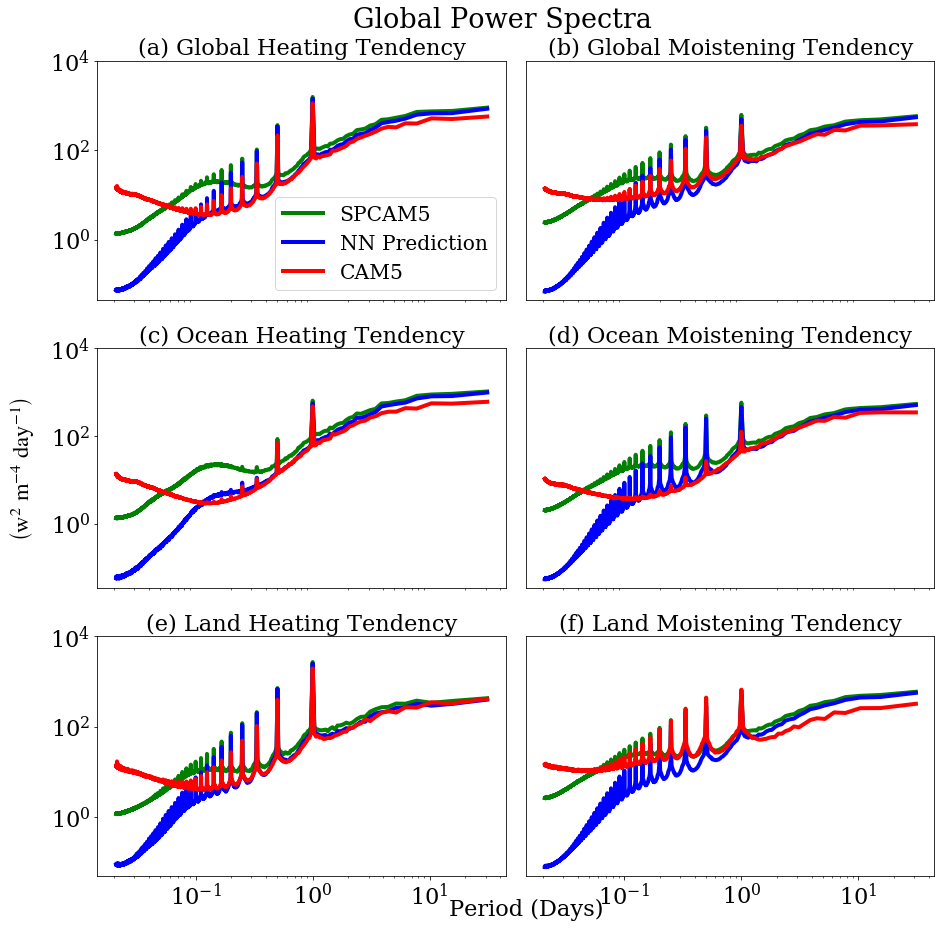

In [94]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0,0].plot(1/SPCAM5_freqs, Heat_Spectra_True, label = "SPCAM5", color="green")
ax[0,0].plot(1/SPCAM5_freqs, Heat_Spectra_Predict, label = "NN Prediction", color="blue")
ax[0,0].plot(1/CAM_Freqs_Spectra[:-1], CAM_Heat_Spectra[:-1], label = "CAM5", color="red")
ax[0,0].set_title("(a) Global Heating Tendency", fontsize = fz)
ax[2,0].set_xlabel("Period (Days)")
ax[2,0].xaxis.set_label_coords(1.05,-0.095)
ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")
ax[0,0].legend(prop={'size': fz*0.9})
ax[0,0].set_xticks([])
#ax[0,0].set_ylim(1e-11, 1e-5)

ax[0,1].plot(1/SPCAM5_freqs, Moisture_Spectra_True, label = "SPCAM5", color="green")
ax[0,1].plot(1/SPCAM5_freqs, Moisture_Spectra_Predict, label = "NN Prediction", color="blue")
ax[0,1].plot(1/CAM_Freqs_Spectra[:-1], CAM_Moisture_Spectra[:-1], label = "CAM5", color="red")
ax[0,1].set_title("(b) Global Moistening Tendency", fontsize = fz)
ax[1,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-4} \ day^{-1}}\right)$')
ax[0,1].yaxis.set_label_coords(-1.20,0.5)
ax[0,1].set_xscale("log")
ax[0,1].set_yscale("log")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
#ax[0,1].set_ylim(1e-17, 1e-12)

ax[1,0].plot(1/SPCAM5_freqs, Ocean_Heat_Spectra_True, color="green")
ax[1,0].plot(1/SPCAM5_freqs, Ocean_Heat_Spectra_Predict, color="blue")
ax[1,0].plot(1/CAM_Freqs_Spectra[:-1], Ocean_CAM_Heat_Spectra[:-1], color="red")
ax[1,0].set_title("(c) Ocean Heating Tendency", fontsize = fz)
#ax[0,0].set_xlabel("Period (Days)")
#ax[0,0].xaxis.set_label_coords(1.05,-0.095)
ax[1,0].set_xscale("log")
ax[1,0].set_yscale("log")
#ax[0,0].legend(prop={'size': fz*0.9})
ax[1,0].set_xticks([])
#ax[1,0].set_ylim(1e-11, 1e-5)

ax[1,1].plot(1/SPCAM5_freqs, Ocean_Moisture_Spectra_True, color="green")
ax[1,1].plot(1/SPCAM5_freqs, Ocean_Moisture_Spectra_Predict, color="blue")
ax[1,1].plot(1/CAM_Freqs_Spectra[:-1], Ocean_CAM_Moisture_Spectra[:-1], color="red")
ax[1,1].set_title("(d) Ocean Moistening Tendency", fontsize = fz)
#ax[0,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-2} \ day^{-1}}\right)$')
ax[1,1].yaxis.set_label_coords(-1.20,0.5)
ax[1,1].set_xscale("log")
ax[1,1].set_yscale("log")
ax[1,1].yaxis.tick_right()
ax[1,1].set_xticks([])
#ax[1,1].set_ylim(1e-17, 1e-12)

ax[2,0].plot(1/SPCAM5_freqs, Land_Heat_Spectra_True, color="green")
ax[2,0].plot(1/SPCAM5_freqs, Land_Heat_Spectra_Predict, color="blue")
ax[2,0].plot(1/CAM_Freqs_Spectra[:-1], Land_CAM_Heat_Spectra[:-1], color="red")
ax[2,0].set_title("(e) Land Heating Tendency", fontsize = fz)
#ax[0,0].set_xlabel("Period (Days)")
#ax[0,0].xaxis.set_label_coords(1.05,-0.095)
ax[2,0].set_xscale("log")
ax[2,0].set_yscale("log")
#ax[0,0].legend(prop={'size': fz*0.9})
#ax[2,0].set_ylim(1e-11, 1e-5)

ax[2,1].plot(1/SPCAM5_freqs, Land_Moisture_Spectra_True, color="green")
ax[2,1].plot(1/SPCAM5_freqs, Land_Moisture_Spectra_Predict, color="blue")
ax[2,1].plot(1/CAM_Freqs_Spectra[:-1], Land_CAM_Moisture_Spectra[:-1], color="red")
ax[2,1].set_title("(f) Land Moistening Tendency", fontsize = fz)
#ax[0,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-2} \ day^{-1}}\right)$')
ax[2,1].yaxis.set_label_coords(-1.20,0.5)
ax[2,1].set_xscale("log")
ax[2,1].set_yscale("log")
ax[2,1].yaxis.tick_right()
#ax[2,1].set_ylim(1e-17, 1e-12)

ymin=0
ymax=1e4
ax[0,0].set_ylim(ymin, ymax)
ax[0,1].set_ylim(ymin, ymax)
ax[1,0].set_ylim(ymin, ymax)
ax[1,1].set_ylim(ymin, ymax)
ax[2,0].set_ylim(ymin, ymax)
ax[2,1].set_ylim(ymin, ymax)

ax[0,1].set_yticks([])
ax[1,1].set_yticks([])
ax[2,1].set_yticks([])

plt.suptitle("Global Power Spectra", y=0.93)
plt.subplots_adjust(wspace=0.05)

plt.savefig("Paper_Figures/Figure5.png")
plt.savefig("Paper_Figures/Figure5.pdf")

In [95]:
def LSD(sig_1, sig_2):
    LSE = 0
    for i in range(len(sig_1)):
        LSE += (np.log(sig_1[i]/sig_2[i]))**2
    LSE = LSE/len(sig_1)
    LSE= LSE**0.5
    print("Log Spectral Distance is", LSE)
    return LSE

LSD(Heat_Spectra_True, Heat_Spectra_Predict)
#LSD(Heat_Spectra_True, CAM_Heat_Spectra[:-1])

LSD(Moisture_Spectra_True, Moisture_Spectra_Predict)
#LSD(Moisture_Spectra_True, CAM_Moisture_Spectra[:-1])

LSD(Ocean_Heat_Spectra_True, Ocean_Heat_Spectra_Predict)
#LSD(Ocean_Heat_Spectra_True, Ocean_CAM_Heat_Spectra[:-1])

LSD(Ocean_Moisture_Spectra_True, Ocean_Moisture_Spectra_Predict)
#LSD(Ocean_Moisture_Spectra_True, Ocean_CAM_Moisture_Spectra[:-1])

LSD(Land_Heat_Spectra_True, Land_Heat_Spectra_Predict)
#LSD(Land_Heat_Spectra_True, Land_CAM_Heat_Spectra[:-1])

LSD(Land_Moisture_Spectra_True, Land_Moisture_Spectra_Predict)
#LSD(Land_Moisture_Spectra_True, Land_CAM_Moisture_Spectra[:-1])
print(" ")

Log Spectral Distance is 2.395888556623852
Log Spectral Distance is 2.6789473638361634
Log Spectral Distance is 2.596436341997947
Log Spectral Distance is 2.6789473638361634
Log Spectral Distance is 2.101038440138632
Log Spectral Distance is 2.6789473638361634
 


# Figure 6

In [96]:
Autocorr_latlon_freq = np.load("Data_For_Paper/Autocorr_SFC_Frequency.npy")
April_SPCAM5_lat_lon = np.load("Data_For_Paper/April_SPCAM5_15_Min_Interval_Heat.npy")
SPCAM5_lat_lon = April_SPCAM5_lat_lon[:,:,-1]
R2_Bottom_10 = np.percentile(SPCAM5_lat_lon, 10)
Autocorr_Top_10 = np.percentile(Autocorr_latlon_freq, 90)

(96, 144) (96, 144) (96, 30)


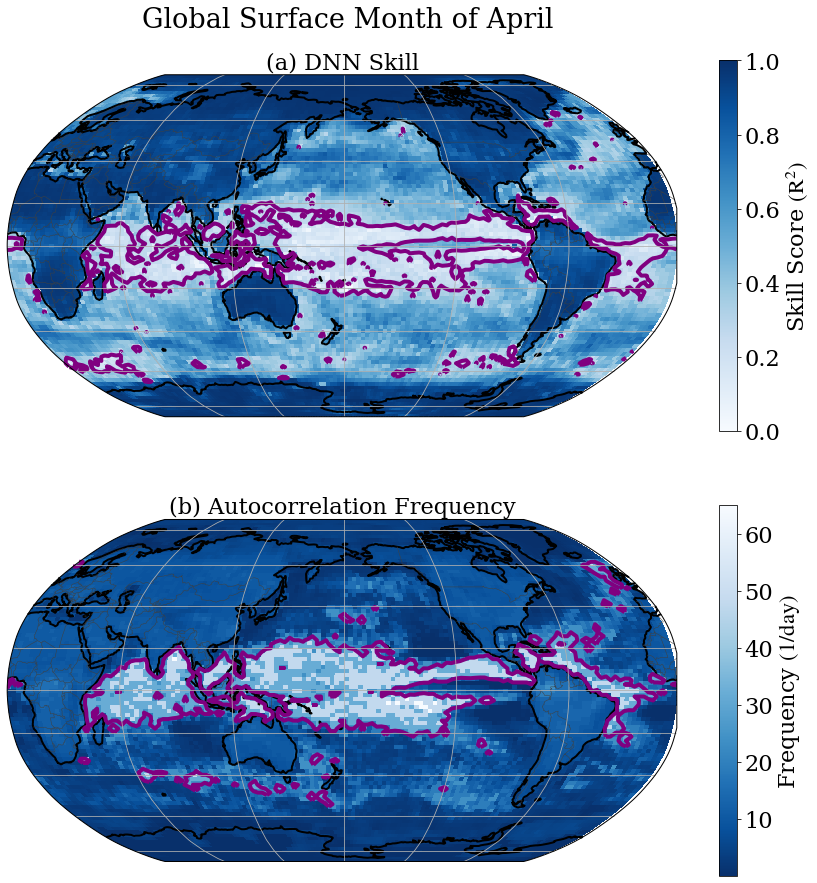

In [97]:
print(Xvar.shape, Yvar.shape, SPCAM5_heat_15.shape)
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
contour_plot = ax[0].pcolormesh(Xvar, Yvar, np.squeeze(SPCAM5_lat_lon.T),cmap='Blues', vmin = 0, vmax = 1.0, transform=ccrs.PlateCarree())
ax[0].contour(Xvar, Yvar, np.squeeze(SPCAM5_lat_lon.T), [R2_Bottom_10], colors='purple', linewidths=[4], transform=ccrs.PlateCarree())
plt.colorbar(contour_plot, label = "Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', ax=ax[0])
ax[0].set_title('(a) DNN Skill', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax[1].pcolormesh(Xvar, Yvar, Autocorr_latlon_freq,cmap='Blues_r', vmax = 65, transform=ccrs.PlateCarree())
ax[1].contour(Xvar, Yvar, Autocorr_latlon_freq, [Autocorr_Top_10], colors='purple', linewidths=[4], transform=ccrs.PlateCarree())
plt.colorbar(contour_plot, label = "Frequency "+r'$\left(\mathrm{1 / day}\right)$', ax=ax[1])
ax[1].set_title('(b) Autocorrelation Frequency', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

plt.suptitle("Global Surface Month of April", y=0.93, x=0.44)

plt.savefig("Paper_Figures/Figure6.png")
plt.savefig("Paper_Figures/Figure6.pdf")

In [98]:
pearson_r, pearson_p = stats.pearsonr(SPCAM5_lat_lon.T.ravel(), Autocorr_latlon_freq.ravel())
print(pearson_r, pearson_p)

-0.5748188561622355 0.0


# Figure 7

In [99]:
def stats_gen(datas):
    q1 = []
    median = []
    q3 = []
    for i in range(len(datas[0][0])):
        temp = np.squeeze(datas[:,:,i])
        temp = temp.ravel()
        q1.append(np.nanpercentile(temp, 25))
        median.append(np.nanpercentile(temp, 50))
        q3.append(np.nanpercentile(temp, 75))
    
    q1 = np.array(q1)
    median = np.array(median)
    q3 = np.array(q3)
    
    return q1/np.max(median), median/np.max(median), q3/np.max(median)

def Sig_Test(point_b):
    tcoor = np.arange(0, len(point_b), 1)/96
    it = np.argwhere(np.diff(np.sign(point_b/point_b[0]-np.exp(-1))))[0]
    tau = tcoor[it]
    return tau[0]

def e_time_getter(data_array):
    e_times = np.zeros(shape = (x, y))
    e_times[:,:] = np.nan
    for i in range(len(data_array)):
        for j in range(len(data_array[i])):
            temp = np.squeeze(data_array[i,j,:])
            value =  Sig_Test(temp)
            e_times[i,j] = value
            
    e_data = e_times.ravel()
    filtered_data = e_data[~np.isnan(e_data)]
    return filtered_data

In [100]:
Autocorr_Tropical_Good = np.load("Data_For_Paper/Autocorr_Tropical_good.npy")
Autocorr_Tropical_Bad = np.load("Data_For_Paper/Autocorr_Tropical_bad.npy")
Autocorr_Midlat_Good = np.load("Data_For_Paper/Autocorr_Midlat_good.npy")
Autocorr_Midlat_Bad = np.load("Data_For_Paper/Autocorr_Midlat_bad.npy")

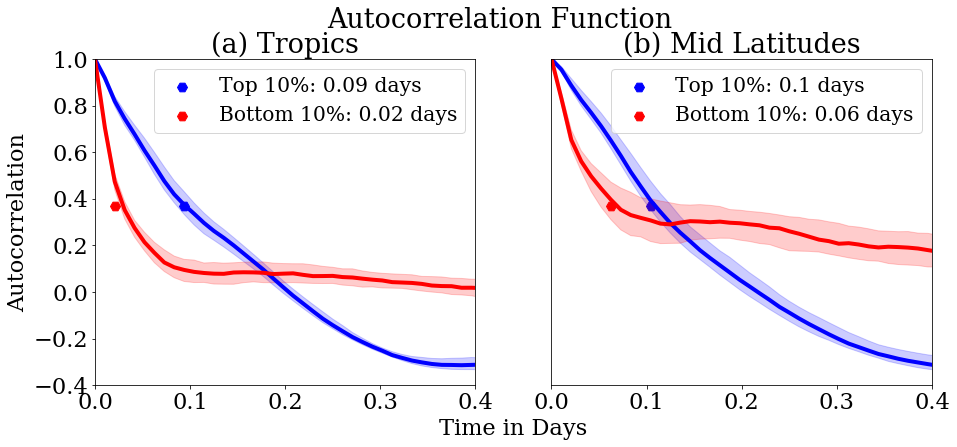

In [101]:
#fig, ax = plt.subplots(1,2,figsize=(15,10))
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].set_title("(a) Tropics")
ax[0].set_xlabel('Time in Days', fontsize = fz)
ax[0].xaxis.set_label_coords(1.1,-0.10)
#good tropics
q1, median, q3 = stats_gen(Autocorr_Tropical_Good)
tcoor = np.arange(0, len(median), 1)/96
y = ax[0].plot(tcoor, median, color = "b")
ax[0].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "b")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[0].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "b", label="Top 10%"+": "+str(round(tau[0],2))+' days')
#bad tropics
q1, median, q3 = stats_gen(Autocorr_Tropical_Bad)
tcoor = np.arange(0, len(median), 1)/96
y = ax[0].plot(tcoor, median, color = "r")
ax[0].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "r")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[0].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "r", label="Bottom 10%"+": "+str(round(tau[0],2))+' days')
ax[0].legend(prop={'size': fz*0.9})
ax[0].set_ylabel("Autocorrelation")
ax[0].set_xlim(0,0.40)
ax[0].set_ylim(-0.4, 1)

ax[1].set_title("(b) Mid Latitudes")
ax[1].set_yticks([])

#good mid lats
q1, median, q3 = stats_gen(Autocorr_Midlat_Good)
tcoor = np.arange(0, len(median), 1)/96
y = ax[1].plot(tcoor, median, color = "b")
ax[1].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "b")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[1].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "b", label="Top 10%"+": "+str(round(tau[0],2))+' days')

#bad midlats
q1, median, q3 = stats_gen(Autocorr_Midlat_Bad)
tcoor = np.arange(0, len(median), 1)/96
y = ax[1].plot(tcoor, median, color = "r")
ax[1].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "r")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[1].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "r", label="Bottom 10%"+": "+str(round(tau[0],2))+' days')

ax[1].legend(prop={'size': fz*0.9})
ax[1].set_xlim(0,0.40) 
ax[1].set_ylim(-0.4, 1)
plt.suptitle("Autocorrelation Function", y=1.0)
plt.savefig("Paper_Figures/Figure7.png")
plt.savefig("Paper_Figures/Figure7.pdf")

# Figure 8

In [102]:
T = np.load("Data_For_Paper/X_vals.npy")
Z = np.load("Data_For_Paper/Z_vals.npy")
anon_ocean_moist_SPCAM5_composite = np.load("Data_For_Paper/LST_anon_ocean_moist_SPCAM5_composite.npy")
anon_ocean_moist_DNN_composite = np.load("Data_For_Paper/LST_anon_ocean_moist_DNN_composite.npy")
anon_land_moist_SPCAM5_composite = np.load("Data_For_Paper/LST_anon_land_moist_SPCAM5_composite.npy")
anon_land_moist_DNN_composite = np.load("Data_For_Paper/LST_anon_land_moist_DNN_composite.npy")

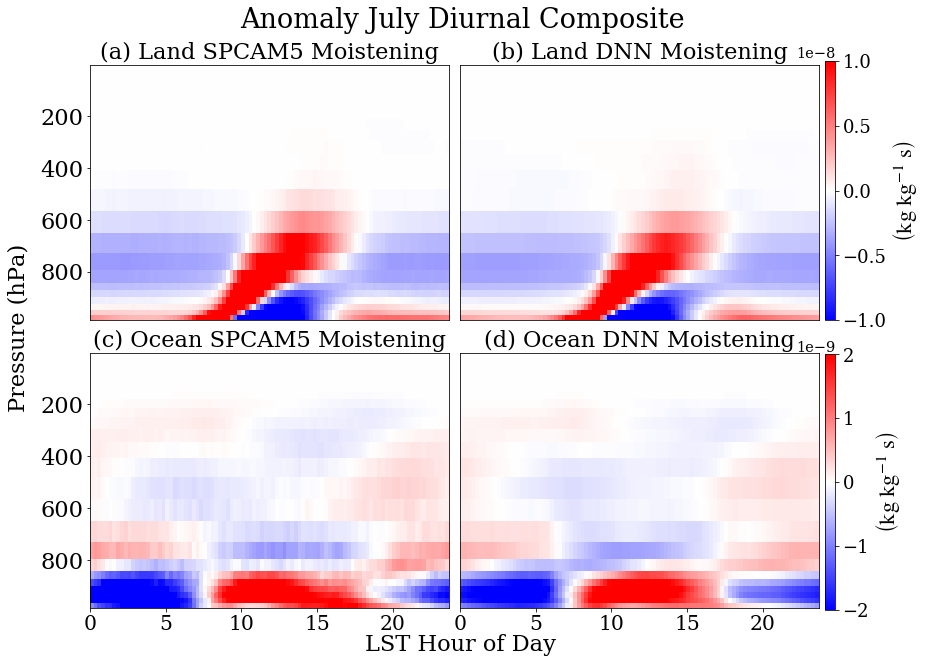

In [103]:
fig, ax = plt.subplots(2,2, figsize=(15,10))


cp = ax[0,0].pcolor(T, Z, anon_land_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[0,0].set_title("(a) Land SPCAM5 Moistening", fontsize = fz)
ax[0,0].locator_params(nbins=8)
ax[0,0].tick_params(axis='x', labelsize=fz*0.9)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

cp = ax[0,1].pcolor(T, Z, anon_land_moist_DNN_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[0,1].set_title("(b) Land DNN Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.525, 0.01, 0.36])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{kg} \ \mathrm{kg^{-1}} \ \mathrm{s}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)


ax[1,1].set_xlabel("LST Hour of Day")
ax[1,1].xaxis.set_label_coords(-0.0,-0.10)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)
ax[1,1].set_yticks([])

cp = ax[1,0].pcolor(T, Z, anon_ocean_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-2e-9, vmax=2e-9)
ax[1,0].set_title("(c) Ocean SPCAM5 Moistening", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

cp = ax[1,1].pcolor(T, Z, anon_ocean_moist_DNN_composite.T, cmap = 'bwr', vmin=-2e-9, vmax=2e-9)
ax[1,1].set_title("(d) Ocean DNN Moistening", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)
ax[1,1].set_ylabel("Pressure (hPa)")
ax[1,1].yaxis.set_label_coords(-1.2,1.1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.1225, 0.01, 0.355])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{kg} \ \mathrm{kg^{-1}} \ \mathrm{s}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)

plt.suptitle("Anomaly July Diurnal Composite", y = 0.96, x=0.47)
plt.subplots_adjust(hspace=0.13, wspace=0.03)
plt.savefig("Paper_Figures/Figure8.png")
plt.savefig("Paper_Figures/Figure8.pdf")

# Figure 9

In [104]:
CAM_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_CAM.npy")
SPCAM5_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_SPCAM5.npy")
SHERPA_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_SHERPA.npy")
CONSTRAINED_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_CONSTRAINED.npy")
UNCONSTRAINED_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_UNCONSTRAINED.npy")

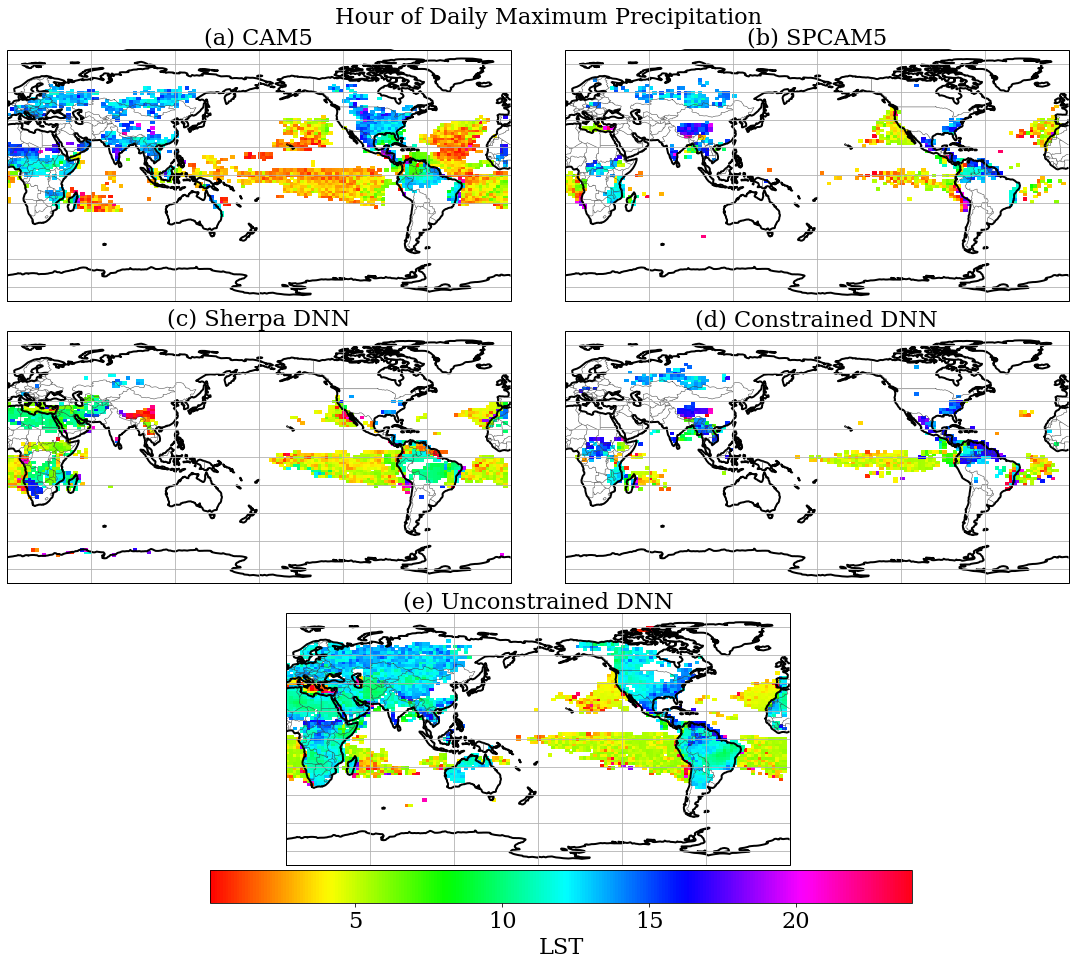

In [105]:
fig, ax = plt.subplots(3,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(20,15)

gs=GridSpec(3,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax5=fig.add_subplot(gs[2,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, CAM_nan_map_lst, cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[0])
ax1.set_title('(a) CAM5', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax2.set_title('(b) SPCAM5', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, SHERPA_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(c) Sherpa DNN', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax4.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(d) Constrained DNN', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, UNCONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(e) Unconstrained DNN', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

#ax6.axis('off')
ax6.set_visible(False)
#ax6.clear()
#ax6.remove()
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,0])


p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.15, 0.09, p0[1]-0.17, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal', label="LST")
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)
plt.savefig("Paper_Figures/Figure9.png")
plt.savefig("Paper_Figures/Figure9.pdf")

# Figure 10

In [106]:
def array_generator(min_val, max_val, percentage):
    listing = []
    for i in range(300):
        if i == 0:
            temp_val = min_val
            listing.append(temp_val)
        else:
            if temp_val < max_val:
                temp_val = temp_val*percentage
                listing.append(temp_val)
        
    return np.array(listing)
#array_generator(0.03, maxi, 1.07)

In [107]:
CON = np.load("Data_For_Paper/Summer_Constrained_DNN_Precip_Prediction.npy")
UCON = np.load("Data_For_Paper/Summer_Unconstrained_DNN_Precip_Prediction.npy")
D = np.load("Data_For_Paper/Summer_SHERPA_DNN_Precip_Prediction.npy")
T = np.load("Data_For_Paper/Summer_SPCAM5_Prepip_Truth.npy")
C = np.load("Data_For_Paper/Summer_CAM5_PRECIP.npy")
m = np.load("Data_For_Paper/Summer_Precip_Max_Scalar.npy")
M = np.load("Data_For_Paper/Summer_Precip_Min_Scalar.npy")

CON_ocean = np.load("Data_For_Paper/Summer_Constrained_Ocean_SPCAM5_Precip_Prediction.npy")
UCON_ocean = np.load("Data_For_Paper/Summer_Unconstrained_Ocean_SPCAM5_Precip_Prediction.npy")
D_ocean = np.load("Data_For_Paper/Summer_SHERPA_Ocean_SPCAM5_Precip_Prediction.npy")
T_ocean = np.load("Data_For_Paper/Summer_Ocean_SPCAM5_Prepip_Truth.npy")
C_ocean = np.load("Data_For_Paper/Summer_Ocean_CAM5_PRECIP.npy")
m_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Max_Scalar.npy")
M_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Min_Scalar.npy")

CON_land = np.load("Data_For_Paper/Summer_Constrained_Land_SPCAM5_Precip_Prediction.npy")
UCON_land = np.load("Data_For_Paper/Summer_Unconstrained_Land_SPCAM5_Precip_Prediction.npy")
D_land = np.load("Data_For_Paper/Summer_SHERPA_Land_SPCAM5_Precip_Prediction.npy")
T_land = np.load("Data_For_Paper/Summer_Land_SPCAM5_Prepip_Truth.npy")
C_land = np.load("Data_For_Paper/Summer_Land_CAM5_PRECIP.npy")
m_land = np.load("Data_For_Paper/Summer_Land_Precip_Max_Scalar.npy")
M_land = np.load("Data_For_Paper/Summer_Land_Precip_Min_Scalar.npy")

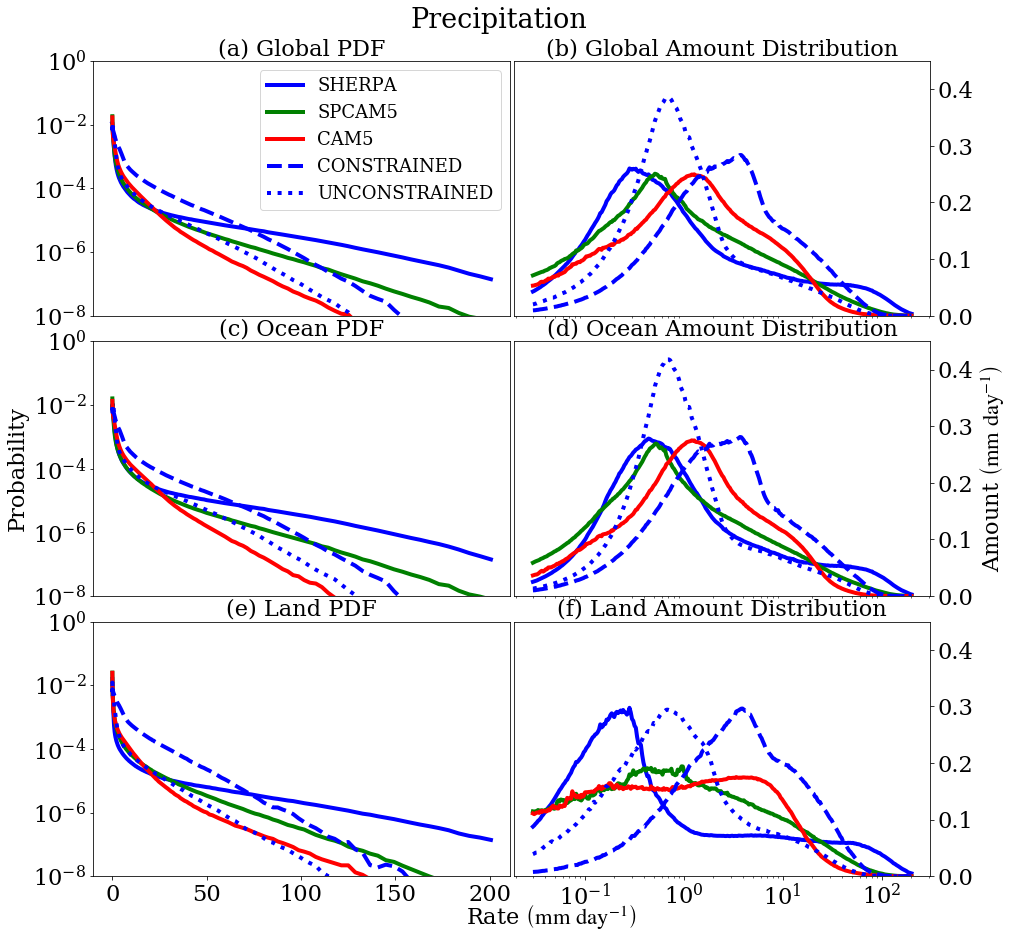

In [108]:
bins = array_generator(0.03, M, 1.03)

fig, ax = plt.subplots(3,2,figsize=(15,15))

shared_bins = np.histogram_bin_edges(D, bins=bins, range=(0, M))
freq, edges = np.histogram(D, bins = shared_bins, density=True)
#bad_freq, bad_edges = np.histogram(bad_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON, bins = shared_bins, density=True)

ax[0,1].set_xscale("log")
ax[1,1].set_xscale("log")
ax[2,1].set_xscale("log")

ax[0,0].plot(edges[:-1], freq/np.sum(freq),  label = "SHERPA", color = 'blue')
ax[0,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), label = "SPCAM5", color = 'green')
ax[0,0].plot(edges_cams[:-1], freq_cams/np.sum(freq_cams), label = "CAM5", color = 'red')
ax[0,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), label = "CONSTRAINED", color = 'blue', linestyle='--')
ax[0,0].plot(edges_UCON[:-1], freq_UCON/np.sum(freq_UCON), label = "UNCONSTRAINED", color = 'blue', linestyle=':')
ax[0,0].set_ylim(1e-8, 1)

ax[2,0].set_xlabel('Rate '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[2,0].xaxis.set_label_coords(1.1,-0.1)
ax[1,0].set_ylabel('Probability', fontsize = fz)
ax[0,0].set_title('(a) Global PDF', fontsize = fz)
ax[1,0].set_title('(c) Ocean PDF', fontsize = fz)
ax[2,0].set_title('(e) Land PDF', fontsize = fz)
ax[0,0].set_yscale('log')
ax[0,0].set_xticks([])
    
totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
    
ax[0,1].plot(edges[:-1], totals,  label = "SHERPA", color = 'blue')
ax[0,1].plot(edges_targ[:-1], totals_targ, label = "SPCAM5", color = 'green')
ax[0,1].plot(edges_cams[:-1], totals_cam, label = "CAM5", color = 'red')
ax[0,1].plot(edges_CON[:-1], totals_CON, label = "CONSTRAINED", color = 'blue', linestyle='--')
ax[0,1].plot(edges_UCON[:-1], totals_UCON, label = "UNCONSTRAINED", color = 'blue', linestyle=':')



ax[1,1].set_ylabel('Amount '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[0,1].set_title('(b) Global Amount Distribution', fontsize = fz)
ax[1,1].set_title('(d) Ocean Amount Distribution', fontsize = fz)
ax[2,1].set_title('(f) Land Amount Distribution', fontsize = fz)
ax[0,0].legend(fontsize=fz*0.8, loc = 'best')

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0, 0.45)

shared_bins = np.histogram_bin_edges(D_ocean, bins=bins, range=(0, M))
freq, edges = np.histogram(D_ocean, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_ocean, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_ocean, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_ocean, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_ocean, bins = shared_bins, density=True)

ax[1,0].plot(edges[:-1], freq/np.sum(freq), color = 'blue')
ax[1,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[1,0].plot(edges_cams[:-1], freq_cams/np.sum(freq_cams),  color = 'red')
ax[1,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'b', linestyle='--')
ax[1,0].plot(edges_UCON[:-1], freq_UCON/np.sum(freq_UCON),  color = 'b', linestyle=':')
ax[1,0].set_xticks([])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]

ax[1,1].plot(edges[:-1], totals, color = 'blue')
ax[1,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[1,1].plot(edges_cams[:-1], totals_cam, color = 'red')
ax[1,1].plot(edges_CON[:-1], totals_CON, color = 'blue', linestyle='--')
ax[1,1].plot(edges_UCON[:-1], totals_UCON, color = 'blue', linestyle=':')
ax[1,1].set_xticks([])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylim(0, 0.45)

shared_bins = np.histogram_bin_edges(D_land, bins=bins, range=(0, M))
freq, edges = np.histogram(D_land, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_land, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_land, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_land, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_land, bins = shared_bins, density=True)

ax[2,0].plot(edges[:-1], freq/np.sum(freq), color = 'blue')
ax[2,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[2,0].plot(edges_cams[:-1], freq_cams/np.sum(freq_cams),  color = 'red')
ax[2,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'blue', linestyle='--')
ax[2,0].plot(edges_UCON[:-1], freq_UCON/np.sum(freq_UCON),  color = 'blue', linestyle=':')
ax[2,0].set_yscale('log')
ax[2,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]

ax[2,1].plot(edges[:-1], totals, color = 'blue')
ax[2,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[2,1].plot(edges_cams[:-1], totals_cam, color = 'red')
ax[2,1].plot(edges_CON[:-1], totals_CON, color = 'blue', linestyle='--')
ax[2,1].plot(edges_UCON[:-1], totals_UCON, color = 'blue', linestyle=':')
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(0, 0.45)
plt.suptitle("Precipitation", y=0.93)
plt.subplots_adjust(wspace=0.01, hspace=0.10)

plt.savefig("Paper_Figures/Figure10.png")
plt.savefig("Paper_Figures/Figure10.pdf")

# Figure 12

In [109]:
sd_heat_diff = np.load("Data_For_Paper/sd_heat_diff.npy")
sd_moist_diff = np.load("Data_For_Paper/sd_moist_diff.npy")
sd_truth_moist_avg = np.load("Data_For_Paper/sd_truth_moist_avg.npy")
sd_DNN_moist_avg = np.load("Data_For_Paper/sd_DNN_moist_avg.npy")
sd_truth_heat_avg = np.load("Data_For_Paper/sd_truth_heat_avg.npy")
sd_DNN_heat_avg = np.load("Data_For_Paper/sd_DNN_heat_avg.npy")

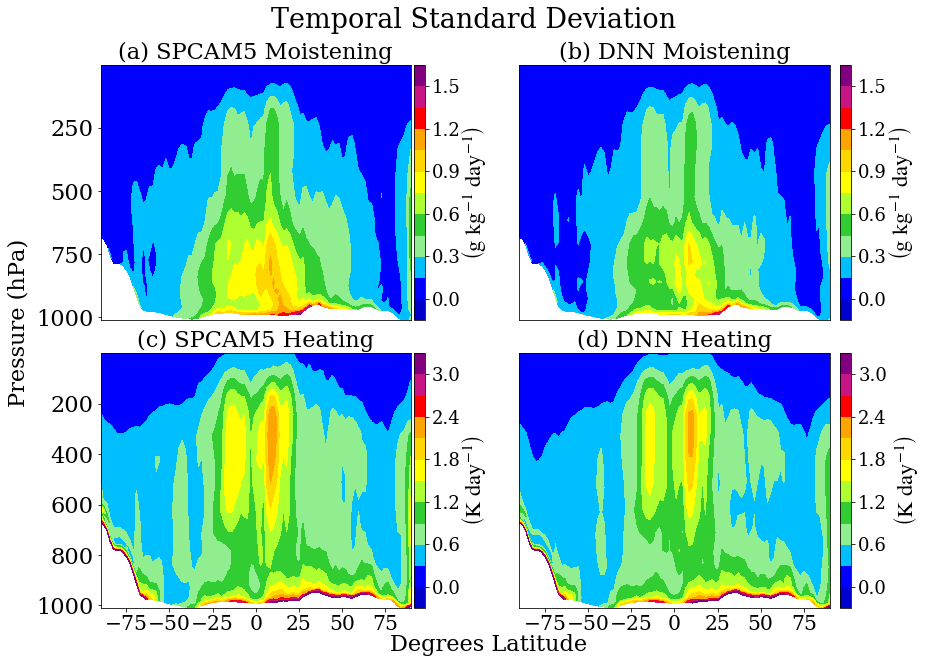

In [110]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
cmap = matplotlib.colors.ListedColormap(["mediumblue","blue", "deepskyblue", "aquamarine", "lightgreen","limegreen","greenyellow","yellow","gold","orange","orangered","red","mediumvioletred","purple"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N) 

cp = ax[0,0].contourf(SPCAM5_Xs, SPCAM5_pband, sd_truth_moist_avg, sd_moist_diff, cmap = cmap, vmin=-0.15, vmax=1.65)
ax[0,0].set_title("(a) SPCAM5 Moistening", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.415, 0.525, 0.01, 0.355])
cbar = fig.colorbar(cp, cax=cbar_ax)
cbar.set_label(label=r'$\left(\mathrm{g} \ \mathrm{kg^{-1}} \ \mathrm{day^{-1}}\right)$', labelpad=-1.5)
cbar.ax.tick_params(labelsize=fz*0.8)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)

cp = ax[0,1].contourf(SPCAM5_Xs, SPCAM5_pband, sd_DNN_moist_avg, sd_moist_diff, cmap = cmap, vmin=-0.15, vmax=1.65)
ax[0,1].set_title("(b) DNN Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.58,-0.01)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.525, 0.01, 0.355])
cbar = fig.colorbar(cp, cax=cbar_ax)
cbar.set_label(label=r'$\left(\mathrm{g} \ \mathrm{kg^{-1}} \ \mathrm{day^{-1}}\right)$', labelpad=-1.5)
cbar.ax.tick_params(labelsize=fz*0.8)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)

cp = ax[1,0].contourf(SPCAM5_Xs, SPCAM5_pband, sd_truth_heat_avg, sd_heat_diff, cmap = cmap, vmin=-0.3, vmax=3.3)
ax[1,0].set_title("(c) SPCAM5 Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
#ax[1,0].set_xticks([])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.415, 0.125, 0.01, 0.355])
cbar = fig.colorbar(cp, cax=cbar_ax)
cbar.set_label(label=r'$\left(\mathrm{K} \ \mathrm{day^{-1}}\right)$', labelpad=-1.5)
cbar.ax.tick_params(labelsize=fz*0.8)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)

cp = ax[1,1].contourf(SPCAM5_Xs, SPCAM5_pband, sd_DNN_heat_avg, sd_heat_diff, cmap = cmap, vmin=-0.3, vmax=3.3)
ax[1,1].set_title("(d) DNN Heating", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
#ax[1,1].set_xticks([])
ax[1,1].set_xlabel("Degrees Latitude")
ax[1,1].xaxis.set_label_coords(-0.10,-0.1)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.125, 0.01, 0.355])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{K} \ \mathrm{day^{-1}}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)


plt.suptitle("Temporal Standard Deviation", y = 0.96, x=0.47)
plt.subplots_adjust(hspace=0.13, wspace=0.35)
print(" ")

plt.savefig("Paper_Figures/Figure12.png")
plt.savefig("Paper_Figures/Figure12.pdf")

# Figure 13

In [111]:
heat_diff_levels = np.load("Data_For_Paper/heat_diff_levels.npy")
moist_diff_levels = np.load("Data_For_Paper/moist_diff_levels.npy")
diff_levels = np.load("Data_For_Paper/diff_levels.npy")
diff_heat_avg = np.load("Data_For_Paper/diff_heat_avg.npy")
diff_moist_avg = np.load("Data_For_Paper/diff_moist_avg.npy")
diff = np.load("Data_For_Paper/Paper_Annual_Precip_Error.npy")

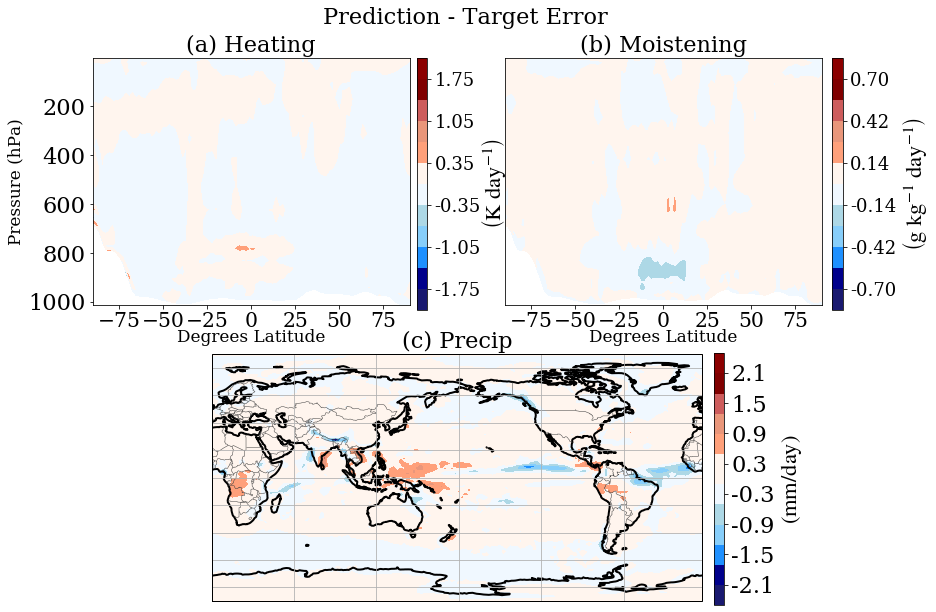

In [112]:
fig=plt.figure(figsize=(15,10))
gs=GridSpec(2,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[0,1]) # First row, second column 
ax3=fig.add_subplot(gs[1,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns

cmap = matplotlib.colors.ListedColormap(["midnightblue","darkblue","dodgerblue","lightskyblue","lightblue","aliceblue","seashell","lightsalmon","darksalmon","indianred","maroon","darkred"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N)

cp = ax1.contourf(SPCAM5_Xs, SPCAM5_pband, diff_heat_avg, heat_diff_levels, cmap = cmap, vmin=-2.10, vmax=2.10)
ax1.set_title("(a) Heating", fontsize = fz)
#ax1.grid(True)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel("Pressure (hPa)", size=fz*0.75)
ax1.locator_params(nbins=8)
ax1.tick_params(axis='x', labelsize=fz*0.9)
ax1.set_xlabel("Degrees Latitude", fontsize=fz*0.75)
ax1.xaxis.set_label_coords(0.50,-0.1)

cbar_ax = fig.add_axes([0.425, 0.53, 0.01, 0.35])
cbar = fig.colorbar(cp, cax=cbar_ax, ticks=[-1.75,-1.05,-0.35,0.35,1.05,1.75])
cbar.ax.set_yticklabels(['-1.75', '-1.05', '-0.35','0.35','1.05','1.75'])
cbar.set_label(label=r'$\left(\mathrm{K} \ \mathrm{day^{-1}}\right)$', labelpad=-1.5)
cbar.ax.tick_params(labelsize=fz*0.8)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)

cp = ax2.contourf(SPCAM5_Xs, SPCAM5_pband, diff_moist_avg, moist_diff_levels, cmap = cmap, vmin=-0.84, vmax=0.84)
ax2.set_title("(b) Moistening", fontsize = fz)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_yticks([])
#ax2.grid(True, axis='both')
ax2.set_xlabel("Degrees Latitude", fontsize=fz*0.75)
ax2.xaxis.set_label_coords(0.50,-0.1)
ax2.locator_params(nbins=8)
ax2.tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.53, 0.01, 0.35])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{g} \ \mathrm{kg^{-1}} \ \mathrm{day^{-1}}\right)$', cax=cbar_ax, ticks=[-0.7,-0.42,-0.14,0.14,0.42,0.70])
cbar.ax.set_yticklabels(['-0.70', '-0.42', '-0.14','0.14','0.42','0.70'])
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
register_bottom_offset(cbar.ax.yaxis, bottom_offset)

cmap = matplotlib.colors.ListedColormap(["mediumblue","blue", "deepskyblue", "aquamarine", "lightgreen","limegreen","greenyellow","yellow","gold","orange","orangered","red","mediumvioletred","purple"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N) 

cmap = matplotlib.colors.ListedColormap(["midnightblue","darkblue","dodgerblue","lightskyblue","lightblue","aliceblue","seashell","lightsalmon","darksalmon","indianred","maroon","darkred"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,5), cmap.N)
contour_plot = ax3.contourf(Xvar, Yvar, diff,diff_levels,cmap=cmap, vmin =-2.5, vmax=2.5, transform=ccrs.PlateCarree())
#fig.subplots_adjust(right=0.8)
cbaxes = fig.add_axes([0.70, 0.12, 0.01, 0.35])
cbar = plt.colorbar(contour_plot, cax = cbaxes, label=r'$\left(\mathrm{mm/day}\right)$',ticks=[-2.1,-1.5,-0.9,-0.3,0.3,0.9,1.5,2.1]) 
cbar.ax.set_yticklabels(['-2.1', '-1.5', '-0.9','-0.3','0.3','0.9','1.5','2.1'])
ax3.set_title('(c) Precip', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

plt.subplots_adjust(hspace=0.20, wspace=0.30)
plt.suptitle("Prediction - Target Error", y=0.95, x=0.47, fontsize = fz)

plt.savefig("Paper_Figures/Figure13.png")
plt.savefig("Paper_Figures/Figure13.pdf")